# Importing the necessary libraries and modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_curve
import warnings

warnings.filterwarnings('ignore')

# Reading the CSV File

In [2]:
db = pd.read_csv('diabetes.csv')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Total data points: ", db.shape[0])
print("Total features: ", db.shape[1])

Total data points:  768
Total features:  9


In [4]:
print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


#### `No null values` are present but some impossible `zero points` are present in some features.

In [5]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plotting the correlation between each other using heatmap

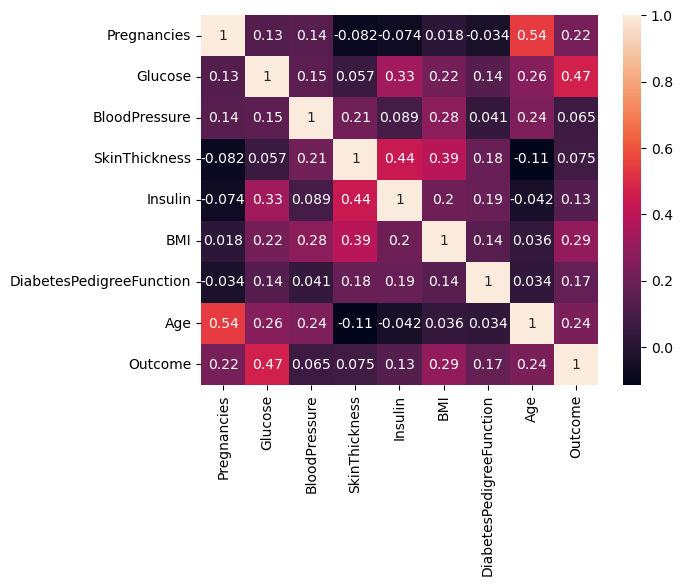

In [6]:
sns.heatmap(db.corr(), annot = True)
plt.show()

There is not much correlation among any feature excpet a slight one between `Pregnancies` and `Age`.

# Plotting BoxPlot for detecting Outliers

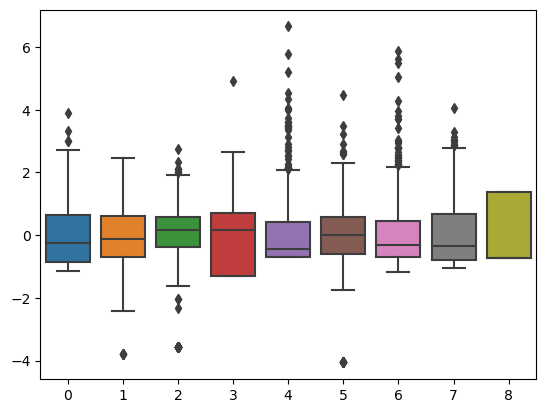

In [7]:
scaler = StandardScaler()
scaled_db = scaler.fit_transform(db)
sns.boxplot(scaled_db)
plt.show()

#### There are many outliers in `Insulin`, `BMI`, `DiabetesPedigreeFunction`.

# Replacing `0` entries with the mean or median

In [8]:
db['Glucose'] = db['Glucose'].replace(0, db['Glucose'].mean())
db['BloodPressure'] = db['BloodPressure'].replace(0, db['BloodPressure'].mean())
db['SkinThickness'] = db['SkinThickness'].replace(0, db['SkinThickness'].mean())
db['Insulin'] = db['Insulin'].replace(0, db['Insulin'].median())
db['BMI'] = db['BMI'].replace(0, db['BMI'].mean())
db['DiabetesPedigreeFunction'] = db['DiabetesPedigreeFunction'].replace(0, db['DiabetesPedigreeFunction'].median())
db['Age'] = db['Age'].replace(0, db['Age'].mean())

# Removing the outliers 

In [9]:
from scipy import stats

# Calculate the z-scores for each column
z_scores = stats.zscore(db)

# Remove outliers from the DataFrame
db_clean = db[(z_scores < 3).all(axis=1)]

In [10]:
db_clean.shape

(721, 9)

#### There are no categorical features here.

# Splitting the dataset into test and train dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(db_clean.iloc[:,:-1], db_clean['Outcome'], test_size=0.30, random_state=10)

# Using Tree Classifier

In [12]:
tree_classifier = DecisionTreeClassifier()
parameter = {'criterion': ['gini', 'entropy', 'logloss'],
            'max_depth': [3,4,5,6,None],
            'max_features': ['auto', 'sqrt', 'log2']}
grid = GridSearchCV(tree_classifier, param_grid=parameter, cv = 5, verbose = True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [3, 4, 5, 6, None],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [13]:
# Determining the best parameters
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}

In [14]:
tree_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, max_features = 'auto')
tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, max_features='auto')

In [15]:
y_pred = tree_classifier.predict(X_test)

In [16]:
print('The accuracy is', accuracy_score(y_test, y_pred))
print('The recall value is', recall_score(y_test, y_pred))
print('The confusion matrix is', confusion_matrix(y_test, y_pred), sep = '\n')
print('The f1 score is', f1_score(y_test, y_pred))

The accuracy is 0.7511520737327189
The recall value is 0.547945205479452
The confusion matrix is
[[123  21]
 [ 33  40]]
The f1 score is 0.5970149253731344


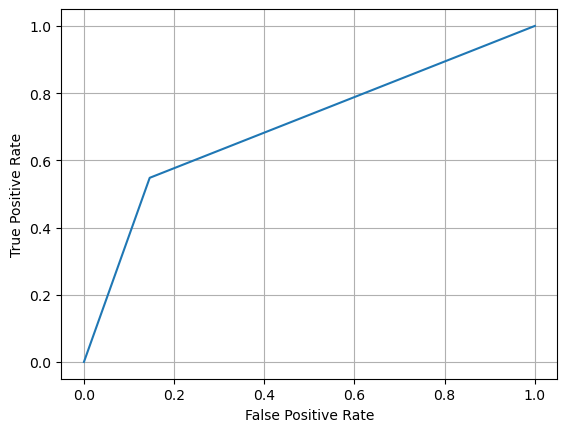

TPR: [0.0, 0.547945205479452, 1.0]
FPR: [0.0, 0.14583333333333334, 1.0]


In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

print("TPR:", list(tpr))
print('FPR:', list(fpr))

It seems that the classifier has a sensitivity of **0.5479452** at an FPR of **0.1458333**. This means that at this threshold, the classifier correctly identifies **54.79452%** of positive cases while incorrectly identifying **14.58333%** of negative cases as positive.

# Plotting the tree

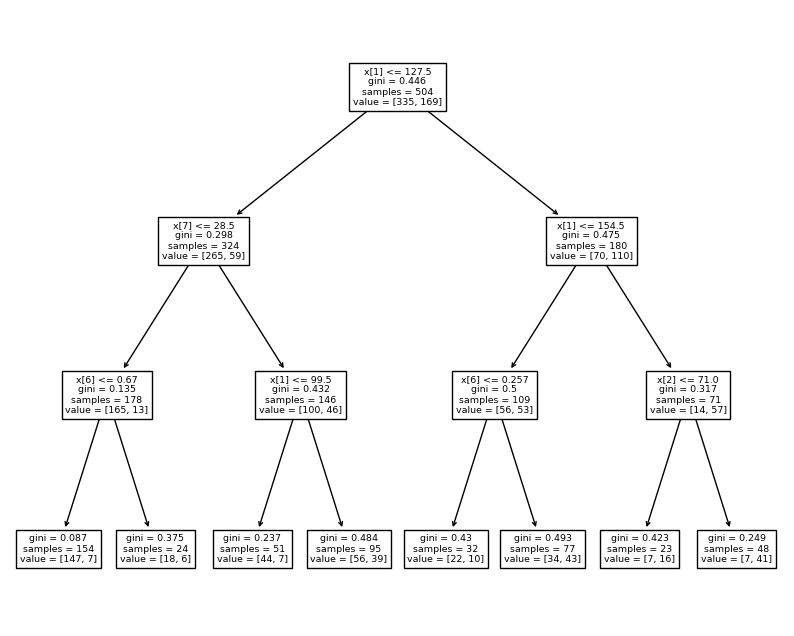

In [20]:
plt.figure(figsize=(10,8))
plot_tree(tree_classifier, filled = True)

plt.show()